In [11]:
from rllab.algos.trpo import TRPO
from rllab.baselines.linear_feature_baseline import LinearFeatureBaseline
from rllab.envs.gym_env import GymEnv
from rllab.envs.normalized_env import normalize
from rllab.policies.gaussian_mlp_policy import GaussianMLPPolicy
from rllab.policies.constant_control_policy import ConstantControlPolicy
import rllab.misc.logger as logger
from rllab.sampler import parallel_sampler
from test import test_const_adv, test_rand_adv, test_learnt_adv, test_rand_step_adv, test_step_adv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os
import gym
import random
import pickle
import scipy
import argparse

In [13]:
filepath = 'results/StaticSwimmer/static_swimmer.p'
#filepath = 'results/StaticHopper/static_hopper.p'
#filepath = 'results/StaticCheetah/static_cheetah.p'
filepath = 'initial_results/Walker/env-Walker2dAdv-v1_Exp1_Itr500_BS25000_Adv0.25_stp0.01_lam0.97_414604.p'

filtercheck = 0

savename = filepath #filepath to results
if_filtering = bool(filtercheck) #0 for no filtering. 1 for filtering

res_D = pickle.load(open(savename,'rb'))
args = res_D['args']
pro_policy = res_D['pro_policy']
adv_policy = res_D['adv_policy']
const_test_rew_summary = res_D['zero_test']
rand_test_rew_summary = res_D['rand_test']
adv_test_rew_summary = res_D['adv_test']

env_name = args[0]
adv_fraction = args[12]
env = normalize(GymEnv(env_name, 3.0))
env_orig = normalize(GymEnv(env_name, 1.0))

2018-04-08 18:24:21.073182 EDT | Warning: skipping Gym environment monitoring since snapshot_dir not configured.


[2018-04-08 18:24:21,074] Making new env: Walker2dAdv-v1


2018-04-08 18:24:21.424627 EDT | Warning: skipping Gym environment monitoring since snapshot_dir not configured.


[2018-04-08 18:24:21,425] Making new env: Walker2dAdv-v1


891.4665402261769

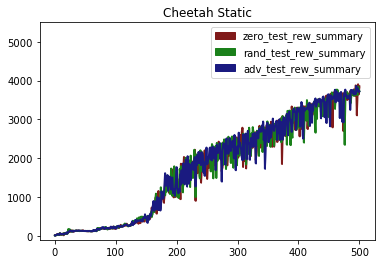

In [7]:
plot_tests = [const_test_rew_summary, rand_test_rew_summary, adv_test_rew_summary]
plot_names = ['zero_test_rew_summary', 'rand_test_rew_summary', 'adv_test_rew_summary']
plot_colors = [(0.5,0.1,0.1), (0.1,0.5,0.1), (0.1,0.1,0.5)]
all_patches = []
for i in range(len(plot_tests)):
    con_rew = np.array(plot_tests[i])
    mean_con = con_rew.mean(0)
    std_con = con_rew.std(0)
    if if_filtering==True:
        mean_window_size = 15
        mean_order = 3
        std_window_size = 45
        std_order = 2
        mean_con = scipy.signal.savgol_filter(mean_con, mean_window_size, mean_order)
        std_con = scipy.signal.savgol_filter(std_con, std_window_size, std_order)
    x = [i for i in range(len(mean_con))]
    plt.plot(x,mean_con,color=plot_colors[i], linewidth=2.0)
    plt.fill_between(x, mean_con-std_con, mean_con+std_con,color=plot_colors[i], alpha=0.5)
    all_patches.append(mpatches.Patch(color=plot_colors[i], label=plot_names[i]))

plt.legend(handles=all_patches)
axes = plt.gca()
axes.set_ylim([-100,5500])
plt.title("Cheetah Static")
plt.show()

In [9]:
print(np.average(const_test_rew_summary[len(const_test_rew_summary)-1]))
print(np.average(rand_test_rew_summary[len(const_test_rew_summary)-1]))
print(np.average(adv_test_rew_summary[len(const_test_rew_summary)-1]))

1757.38808342
1762.46409656
1769.21363454


In [ ]:
test_const_adv(env_orig, pro_policy, path_length=300, n_traj=1, render=True)

In [14]:
test_learnt_adv(env, pro_policy, adv_policy, path_length=1000, n_traj=1, render=True)

3697.1530181755179